# Workshop

Se están planeando las rutas de distribución para un conjunto de clientes (Vehicle Routing Problem with Time Windows o VRPTW). Se está contemplando la posibilidad de agrupar a los clientes para asignarlos a vehículos y después resolver un problema de Agente Viajero dentro de cada clúster.

Se le pide a su grupo de trabajo hacer dichos clústeres de clientes.

La información se encuentra en el archivo adjunto.

Para cada cliente se tiene:

* i: Es el identificador del cliente
* x: Es la coordenada x de la localización del cliente
* y: Es la coordenada y de la localización del cliente
* di: Es la demanda del cliente
* ei: Es el inicio de la ventana de tiempo para la entrega
* li: Es el fin de la ventana de tiempo para la entrega

Utilizar el método de K-means utilizando todas las  características del problema.

No puede haber más de 10 clústeres ya que es el número de vehículos disponibles.


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel("data/Datos_VRP.xlsx",index_col="i")
X = df

In [3]:

results = [ [ i+1 for i in range(10) ] for i in range(2)]
for i in range(1,11):
    kms = KMeans(n_clusters = i, init = "k-means++", n_init = 10, max_iter = 100 )
    kms.fit(X)    
    results[1][i-1] = kms.inertia_

print(results[0])
print(results[1])



[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[10587530.590000002, 2742538.125, 1345429.754599567, 813788.6407624633, 503416.6529980108, 385587.5606651802, 294689.68516483513, 251922.68890123034, 230368.11547619046, 209129.54910352803]


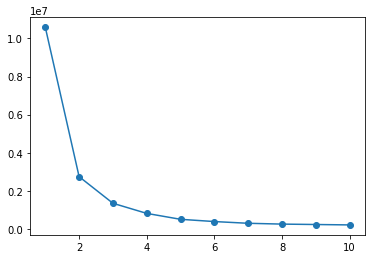

In [4]:
plt.plot(results[0],results[1],marker = "o")

## The biggest change in the curve is made with 2 clusters

In [5]:
kmsPredict = KMeans(n_clusters = 2, init = "k-means++", n_init = 10, max_iter = 100 )
YPredict = kmsPredict.fit_predict(X)
df["2-Cluster-Predict"] = YPredict
df.head()

,x,y,di,ei,li,2-Cluster-Predict
i,,,,,,
1,25,85,20,673,793,1
2,22,75,30,152,272,0
3,22,85,10,471,591,1
4,20,80,40,644,764,1
5,20,85,20,73,193,0


In [6]:
df.to_excel("result-clustering-KMeans.xlsx")